# CNN
이 노트는 CNN(Convolution Neural Network)을 배우기 위한 주피터노트북이다. 먼저, 이 CNN이 영상에 잘 적용되는 이유를 설명하고자 한다. 한 가지 일관되게 기억해야 할 가장 중요한 사실은 CNN은 함수이며 함수는 입력과 출력을 연결짓는 블랙박스(미지의 어떤 것)라는 점이다. 그래서, CNN은 입력: 영상(image),
출력: 범주(nominal)이다. 범주는 고양이, 호랑이와 같은 개념들이고 보면 되고, 그렇기 때문에 영상을 개념들로 맵핑한다 하여 CNN을 분류기라고도 부른다.

먼저 CNN을 이해하기 위해 입력으로 들어올 영상을 알아보자. 이를 위해 파이썬 코드에서 이미지(정지영상)의 표현법을 익혀보도록 하자.


## 정지영상(이미지)
이미지는 파이썬 코드에서 흑백영상의 경우 1차원 배열로, 컬러영상의 경우 3차원 배열로 표현된다.

예를 들어, 28x28 크기의 흑백영상은 (28,28,1)로 표현되며, 컬러영상은 (28, 28, 3)으로 표현된다. 즉, 3차원배열의 마지막 차원이 흑백의 경우 gray scale의 1채널이 존재하고, 컬러영상의 경우 R,G,B scale의 3채널이 존재한다. 1,2차원은 영상의 가로, 세로 크기를 의미한다. 

여기서, numpy의 array를 이용한 간단한 영상 표현법을 살펴보자.

(1, 3, 3, 1)


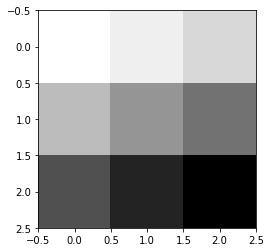

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#tensorflow interactive session
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                             [[7],[8],[9]]]],dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3),cmap='Greys')

[[[[1.  0.  0. ]
   [0.  1.  0. ]
   [0.  0.  1. ]]

  [[1.  1.  0. ]
   [0.  1.  1. ]
   [1.  0.  1. ]]

  [[1.  0.5 0.5]
   [0.5 1.  0.5]
   [0.5 0.5 1. ]]]]
(1, 3, 3, 3)


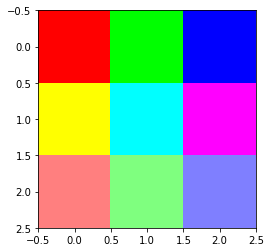

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#tensorflow interactive session
sess = tf.InteractiveSession()
image = np.array([[[[1.,0.,0.], [0.,1.,0.], [0.,0.,1.]],
                  [[1.,1.,0.], [0.,1.,1.], [1.,0.,1.]],
                  [[1.,.5,.5], [.5,1.,.5], [.5,.5,1.]]]],dtype=np.float32)
print(image)
print(image.shape)
plt.imshow(image[0])

만약 numpy array에 대해서 좀더 상세하게 알고 싶다면, 다음 링크 https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html
참조하라. 
간단하게 요점만 언급하면, array에서 꼭 알아야 할 사항은 ndim, shape, size의 개념을 구분할 줄 알아야 한다는 점이다.
그리고, 이것을 1차원 array, 2차원 array, 3차원 array, 혹은 그 이상 차원의  array 표현 방법을 익혀두면 앞으로 영상데이터를 다루는 데 꼭 필요한 선결조건이다. 이 기초가 튼튼하지 못하면 파이썬 코드를 이해하는 데 어려움을 격게 될 것이다.

##filter

아래 코드는 tensorflow의 constant로 weight를 정의한 것이다. 여기서, array형태의 데이터가 인자로 전달된다. 

In [81]:
weight=tf.constant([[[[1.]],[[1.]]],
                    [[[1.]],[[1.]]]])
print("weight.shape: ",weight.shape)

weight.shape:  (2, 2, 1, 1)


여기서, array는 (2,2,1,1)의 shape을 가진다. 4차원 배열이다. 수강생 여러분은 여기서 한가지 확실해하고 넘어가야할 부분은 "어떤 shape의 array든지 정의할 수 있도록" 연습을 해야 한다. 이렇게 정의할 수 있도록 하는 좋은 한가지 팁은 [다음의 [가 몇 개 나오는지가 shape의 모양을 결정한다. 단, 주의할 사항은 제일 마지막에는 []안의 원소의 개수로 정해진다. 위의 예에서, 대괄호([)가 4개 나온다. 4차원 배열이다. 다음으로 각 차원에서 어떤 shape을 가지느냐 이다.  그것은 뒤에서 세는 것이 좋다. 즉, 제일 안쪽 대괄호의 안의 원소를 꼼마로 구분할 떄 몇 개인지가 제일 마지막 차원의 크기이다. 구분없이 1개 존재한다. 다음으로 제일 안쪽 대괄호를 포함하는 바깥 대괄호의 원소를 콤마로 구분하여 몇 개 있느냐이다. 역시, 1개이다. 그 다음 바깥 대괄호는 2개의 원소를 가진다. 또한, 다음 바깥(사실상 제일 바깥) 대괄호는 역시 2개를 가진다. 따라서, 2,2,1,1이 된다.


## Tensorflow에서 이미지배열과 필터배열의 각 차원의 의미
Tensorflow에서의 이미지배열과 필터배열에 대한 의미는 다음과 같이 약속한다.

Image: 1,3,3,3 image, Filter: 2,2,3,1, Stride: 1x1x1x1, Padding: VALID
1,3,3,3 image: (image개수, 가로픽셀, 세로픽셀, 색깔채널수)

2,2,3,1 filter: (가로픽셀,세로픽셀,색깔채널수, 필터개수)

1,1 stride: (가로, 세로)

valid

SAME: 입력영상의 크기와 동일한 결과를 만들 수 있도록 바깥부분을 0으로 채운다.

## Convolution Layer적용
이제 이미지배열도 준비되었고, 필터배열도 준비되었으므로 convolution layer를 만들어 보자.

convolution layer는 tensorflow의 nn모듈에 포함된 conv2d함수를 이용한다. 함수의 인자는 다음과 같다.

tf.nn.conv2d(
image,
filter, 
strides,
padding)

위의 함수가 의도한대로 동작할 수 있도록 적절한 인자를 작성하여 넘겨준다.
1) image -> 앞에서 살펴보았음
2) filter -> 앞에서 살펴보았음
3) strides -> 앞에서 살펴보았음. 1,2,4차원배열로 표현 가능. 1차원은 가로세로 동일, 2차원은 가로, 세로를 의미한다. 4차원은 (이미지,가로,세로,채널)의미
4) padding -> valid, same 중의 하나를 선택함

실제 코드는 아래와 같다.


image.shape (1, 3, 3, 3)
weight.shape:  (2, 2, 3, 1)
conv2d_image.shape:  (1, 3, 3, 1)
[[6. 6. 3.]
 [8. 8. 4.]
 [4. 4. 2.]]


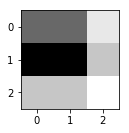

In [6]:
print("image.shape", image.shape)
weight=tf.constant([[[[1.],[1.],[1.]],[[1.],[1.],[1.]]],
                    [[[1.],[1.],[1.]],[[1.],[1.],[1.]]]])
print("weight.shape: ",weight.shape)

conv2d=tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding="SAME")
conv2d_img=conv2d.eval()

#shape으로 확인하기 위한 코드
print("conv2d_image.shape: ", conv2d_img.shape)

# 시각화하기 위한 코드 
conv2d_img=np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1),    plt.imshow(one_img[:,:,0].reshape(3,3),cmap='Greys')

3 filter (2,2,3,3): (가로, 세로, 색채널개수, 필터 개수)

image.shape (1, 3, 3, 3)
weight.shape:  (2, 2, 3, 3)
conv2d_image.shape:  (1, 3, 3, 3)
[[6. 6. 3.]
 [8. 8. 4.]
 [4. 4. 2.]]
[[60. 60. 30.]
 [80. 80. 40.]
 [40. 40. 20.]]
[[-6. -6. -3.]
 [-8. -8. -4.]
 [-4. -4. -2.]]


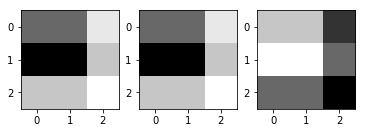

In [83]:
print("image.shape", image.shape)
weight=tf.constant([[[[1.,10.,-1.],[1.,10.,-1.],[1.,10.,-1.]],[[1.,10.,-1.],[1.,10.,-1.],[1.,10.,-1.]]],
                    [[[1.,10.,-1.],[1.,10.,-1.],[1.,10.,-1.]],[[1.,10.,-1.],[1.,10.,-1.],[1.,10.,-1.]]]])
print("weight.shape: ",weight.shape)
conv2d=tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding="SAME")
conv2d_img=conv2d.eval()

print("conv2d_image.shape: ", conv2d_img.shape)
conv2d_img=np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1),    plt.imshow(one_img[:,:,0].reshape(3,3),cmap='Greys')

## Max Pooling

pooling의 사전적 의미는 관계되는 것들 간의 공유를 의미한다. max pooling은 공유를 통하여 최대값을 추출하는 것이라고 볼 수 있다. Max pooling은 앞의 convolution layer의 filter와 유사한 문법을 가진다. 아래의 내용을 보자. 

In [ ]:
import tensorflow as tf
import numpy as np
image = np.array([
                  [
                    [[4.],[3.]],
                    [[2.],[1.]]
                  ]
                 ],dtype=np.float32)
image_mp=tf.nn.max_pool(image, ksize=[1,2,2,1],strides=[1, 1, 1, 1],
                        padding="SAME")
print(image_mp.shape)
print(image_mp.eval())

위에서 max_pool의 인자는 convolution layer를 거친 image이다. ksize는 필터사이즈를 의미하고 strides는 이동간격을 의미한다. padding에서 "SAME"은 image size 와 같은 결과를 내놓기 위해 0-padding한다.

ksize는 일반적으로 [1,2,2,1]을 사용한다. 이것의 의미는 2x2사이즈의 필터를 의미한다. 여기서, 각 원소의 의미는 [image, width, hight, channel]다. 예를 들어, [2, 5, 5, 3] 의 의미는 2개의 이미지 중 가로x세로, 5x5의 필터를 써서 3채널 중 가장 큰 값을 취한다이다.  

여기서는 strides가 1씩이기 때문에 같은 결과가 나온다. 만약 strides size를 변화시키면 어떤 변화가 생기는지 확인해 보라. 

##Strides
strides=[1,2,1,1] #가로로 2씩 이동하는 경우

In [85]:
import tensorflow as tf
import numpy as np
image = np.array([
                  [
                    [[4.],[3.]],
                    [[2.],[1.]]
                  ]
                 ],dtype=np.float32)
image_mp=tf.nn.max_pool(image, ksize=[1,2,2,1],strides=[1, 2, 1, 1],
                        padding="SAME")
print(image_mp.shape)
print(image_mp.eval())

(1, 1, 2, 1)
[[[[4.]
   [3.]]]]


In [86]:
strides=[1,1,2,1] #세로로 2씩 이동하는 경우

In [90]:
import tensorflow as tf
import numpy as np
image = np.array([
                  [
                    [[4.],[3.]],
                    [[2.],[1.]]
                  ]
                 ],dtype=np.float32)
image_mp=tf.nn.max_pool(image, ksize=[1,2,2,1],strides=[1, 1, 2, 1],
                        padding="SAME")
print(image_mp.shape)
print(image_mp.eval())

(1, 2, 1, 1)
[[[[4.]]

  [[2.]]]]


## Max pooling의 동작원리

원래 Max Pooling은 size를 줄이는 효과가 있다. 그래서, Strides를 [1,n1,n2,1]로 하면, 가로크기가 1/n1로, 세로크기가 1/n2로 줄어든다.
물론, ksize도 [1,n1,n2,1]로 맞추어주는 것이 일반적이다.

아래 예의 경우, 이미지가 1,2,3,4로 바꾸었는데 결과는 모두 4로 나온다. 이는 max pooling의 오류를 만들 수 있다는 점이다.

In [97]:
import tensorflow as tf
import numpy as np
image = np.array([[[[1.],[2.]],
                   [[3.],[4.]]]],dtype=np.float32)
image_mp=tf.nn.max_pool(image, ksize=[1,2,2,1],strides=[1, 1, 1, 1],
                        padding="SAME")
print(image_mp.shape)
print(image_mp.eval())

(1, 2, 2, 1)
[[[[4.]
   [4.]]

  [[4.]
   [4.]]]]


# CNN으로 MNIST DATA 분류하기
## MNIST DATA 불러오기
MNIST data는 손글씨 이미지 데이터세트이다. 얀 르쿤, 코리나 콜테츠, 버그즈에 의해 작성되었다. (http://yann.lecun.com/exdb/mnist/ 참조)
tensorflow에서 손쉽게 불러오기하여 작성한 모델의 성능을 테스트할 수 있다.
아래는 mnist를 활용하는 예를 보여준다.

In [19]:
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

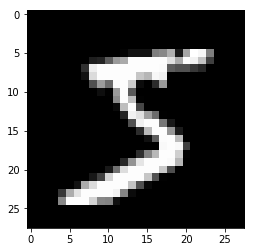

In [28]:
img0 = x_train[0].reshape(28,28)
plt.imshow(img0, cmap='gray')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_27:0", shape=(1, 14, 14, 6), dtype=float32)


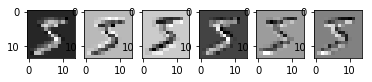

In [30]:
sess = tf.InteractiveSession()

img = tf.cast(tf.reshape(img,[-1,28,28,1]),tf.float32)
#print(img)
#img=tf.cast(img, tf.float32)
#print(img)
# W1 weight 즉, filter를 설정해라.
# 초기화가 중요하다. 초기화에서 초기치 설정방법과 크기가 중요하다. 
# 크기의 의미는 (필터 가로크기, 필터 세로크기, 색깔 channel, 필터개수)
# 초기화는 표준편차 0.1의 정규분포(random)로 생성하라.
W1=tf.Variable(tf.random_normal([3,3,1,6], stddev=0.03))
#conv2d의 인자의미는 (conv할 이미지, filter, strides, padding)
conv_layer = tf.nn.conv2d(img,W1,strides=[1,2,2,1], padding="SAME")
print(conv_layer)
sess.run(tf.global_variables_initializer())
conved_img = conv_layer.eval()
conved_img = np.swapaxes(conved_img,0,3)
for i, one_img in enumerate(conved_img):
    plt.subplot(1,6,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

Tensor("MaxPool_19:0", shape=(1, 7, 7, 6), dtype=float32)


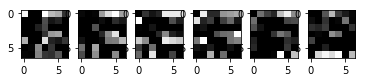

In [31]:
#MNIST Max pooling
# max_pool 함수의 인자의미는 (입력이미지, max_pool필터사이즈, strides, padding)
conved_img=conved_img.reshape(-1,14,14,6)
max_pool_layer = tf.nn.max_pool(conved_img, ksize=[1,2,2,1], 
                            strides=[1,2,2,1], padding='VALID')
print(max_pool_layer)
sess.run(tf.global_variables_initializer())
max_pooled_img = max_pool_layer.eval()
max_pooled_img = np.swapaxes(max_pooled_img, 0, 3)
for i, one_img in enumerate(max_pooled_img):
    plt.subplot(1,6, i+1), plt.imshow(one_img.reshape(7,7), cmap='gray')

In [32]:
#from tensorflow.keras.datasets import mnist
#(x_train, y_train),(x_test,y_test) = mnist.load_data()
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#batch_xs, bat_ys = mnist.train.next_batch(100)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## 본격적으로 CNN으로 MNIST데이터 분류하기

### CNN의 구조
 입력자료는 [None, 28, 28, 1]이다. 


In [33]:

#input placeholders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])

Y = tf.placeholder(tf.float32, [None, 10])

#Conv L1 ImgIn shape=(?, 28, 28, 1)
# Filter W1 size=[3,3,1,6]
W1 = tf.Variable(tf.random_normal([3,3,1, 32],stddev=0.03))

#L1
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')
L1_img = tf.nn.relu(L1)

#Max pooling MP1 size 
MP1 = tf.nn.max_pool(L1_img, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

#Conv L2 ImgIn shape
#Filter W2 size
W2 = tf.Variable(tf.random_normal([3,3,32, 64],stddev=0.03))

#L2
L2 = tf.nn.conv2d(MP1, W2, strides=[1,1,1,1], padding='SAME')
L2_img = tf.nn.relu(L2)

#MP2
MP2 = tf.nn.max_pool(L2_img, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
MP2 = tf.reshape(MP2, [-1, 7 * 7 * 64])

W3=tf.Variable(tf.random_normal([7*7*64,10]))
b = tf.Variable(tf.random_normal([10]))
#몇몇 곳에서는 prediction 혹은 result라고 하기도 한다. hypothesis는 가설로 번역될 수 있고, 예상되는 값이라는 의미이다.
hypothesis = tf.matmul(MP2,W3)+b
learning_rate = 0.001
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

#Training and Evaluation
#initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 15
batch_size = 100
for epoch in range(training_epochs):
    average_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _, = sess.run ([cost, optimizer], feed_dict=feed_dict)
        average_cost += c /total_batch
    print('Epoch:', "%04d" % (epoch + 1), 'cost =', '{:.9f}'.format(average_cost))
                
print('Learning Finished!')
                
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

Epoch: 0001 cost = 0.279568226
Epoch: 0002 cost = 0.086532600
Epoch: 0003 cost = 0.061857335
Epoch: 0004 cost = 0.048856902
Epoch: 0005 cost = 0.041343786
Epoch: 0006 cost = 0.034895854
Epoch: 0007 cost = 0.028989839
Epoch: 0008 cost = 0.025596548
Epoch: 0009 cost = 0.021955364
Epoch: 0010 cost = 0.019150648
Epoch: 0011 cost = 0.016451509
Epoch: 0012 cost = 0.013961930
Epoch: 0013 cost = 0.012442831
Epoch: 0014 cost = 0.011642529
Epoch: 0015 cost = 0.008668751
Learning Finished!
Accuracy: 0.9849


In [37]:

#input placeholders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])

Y = tf.placeholder(tf.float32, [None, 10])

#Conv L1 ImgIn shape=(?, 28, 28, 1)
# Filter W1 size=[3,3,1,6]
W1 = tf.Variable(tf.random_normal([3,3,1, 32],stddev=0.03))

#L1
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')
L1_img = tf.nn.relu(L1)

#Max pooling MP1 size 
MP1 = tf.nn.max_pool(L1_img, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

#Conv L2 ImgIn shape
#Filter W2 size
W2 = tf.Variable(tf.random_normal([3,3,32, 64],stddev=0.03))

#L2
L2 = tf.nn.conv2d(MP1, W2, strides=[1,1,1,1], padding='SAME')
L2_img = tf.nn.relu(L2)

#MP2
MP2 = tf.nn.max_pool(L2_img, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
MP2 = tf.reshape(MP2, [-1, 7 * 7 * 64])

#Conv L3 ImgIn shape
#Filter W3 size
W3 = tf.Variable(tf.random_normal([3,3,64, 128],stddev=0.03))

#L3
L3 = tf.nn.conv2d(MP1, W2, strides=[1,1,1,1], padding='SAME')
L3_img = tf.nn.relu(L3)

#MP3
MP3 = tf.nn.max_pool(L3_img, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
MP3 = tf.reshape(MP3, [-1, 4 * 4 * 128])

W4=tf.Variable(tf.random_normal([4*4*128,10]))
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(MP3,W4)+b
learning_rate = 0.001
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

#Training and Evaluation
#initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 15
batch_size = 100
for epoch in range(training_epochs):
    average_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _, = sess.run ([cost, optimizer], feed_dict=feed_dict)
        average_cost += c /total_batch
    print('Epoch:', "%04d" % (epoch + 1), 'cost =', '{:.9f}'.format(average_cost))
                
print('Learning Finished!')
                
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

InvalidArgumentError: Input to reshape is a tensor with 313600 values, but the requested shape requires a multiple of 2048
	 [[node Reshape_38 (defined at <ipython-input-37-b12e1d349faf>:41) ]]

Caused by op 'Reshape_38', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 539, in run_forever
    self._run_once()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 1775, in _run_once
    handle._run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2843, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2869, in _run_cell
    return runner(coro)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3044, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3209, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-b12e1d349faf>", line 41, in <module>
    MP3 = tf.reshape(MP3, [-1, 4 * 4 * 128])
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 7179, in reshape
    "Reshape", tensor=tensor, shape=shape, name=name)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Input to reshape is a tensor with 313600 values, but the requested shape requires a multiple of 2048
	 [[node Reshape_38 (defined at <ipython-input-37-b12e1d349faf>:41) ]]


In [ ]:
import numpy as np
import cv2

# Load an color image in grayscale
img = cv2.imread('messi5.jpg',0)

In [39]:
print(image)
sess.run(tf.argmax(image,0))
sess.run(tf.argmax(image,3))


[[[[1.  0.  0. ]
   [0.  1.  0. ]
   [0.  0.  1. ]]

  [[1.  1.  0. ]
   [0.  1.  1. ]
   [1.  0.  1. ]]

  [[1.  0.5 0.5]
   [0.5 1.  0.5]
   [0.5 0.5 1. ]]]]


array([[[0, 1, 2],
        [0, 1, 0],
        [0, 1, 2]]])

## Keras를 이용한 CNN

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 89s 1ms/step - loss: 11.6268 - acc: 0.2780 - val_loss: 11.2812 - val_acc: 0.3000
Epoch 2/10
60000/60000 [==============================] - 86s 1ms/step - loss: 12.0988 - acc: 0.2493 - val_loss: 13.0847 - val_acc: 0.1882
Epoch 3/10
60000/60000 [==============================] - 91s 2ms/step - loss: 12.8314 - acc: 0.2039 - val_loss: 11.7162 - val_acc: 0.2731
Epoch 4/10
60000/60000 [==============================] - 92s 2ms/step - loss: 11.5084 - acc: 0.2860 - val_loss: 11.5099 - val_acc: 0.2859
Epoch 5/10
60000/60000 [==============================] - 92s 2ms/step - loss: 12.0329 - acc: 0.2534 - val_loss: 11.7388 - val_acc: 0.2717
Epoch 6/10
60000/60000 [==============================] - 90s 1ms/step - loss: 11.5091 - acc: 0.2859 - val_loss: 11.8678 - val_acc: 0.2637
Epoch 7/10
60000/60000 [==============================] - 89s 1ms/step - loss: 11.3357 - acc: 0.2967 - val_loss: 11.

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

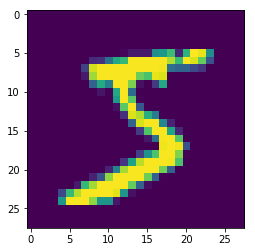

In [5]:
import tensorflow as tf
import keras
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

#predict first 4 images in the test set
model.predict(X_test[:4])

#actual results for first 4 images in test set
y_test[:4]